In [1]:
from PIL import Image
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w = np.loadtxt('weight.txt')
w = w.reshape((len(w), 1))
b = np.loadtxt('bias.txt')

In [3]:
np.random.seed(1)
w_random = np.random.uniform(low=-0.5, high=0.5, size=(12288, 1))
b_random = np.random.uniform(low=-0.5, high=0.5)

In [4]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [5]:
class Predictor:
    def __init__(self, w, b, imagepath):
        self.w = w
        self.b = b
        self.imgarr = np.array(Image.open(imagepath).convert('RGB').resize((64, 64)))
    
    def preview_img(self):
        plt.imshow(self.imgarr)
        plt.show()
    
    def predict(self):
        processed_image = self.imgarr.flatten().reshape(1, 12288).T / 255
        
        A = sigmoid(np.dot(w.T, processed_image) + b)[0,0]
        guess = 0 if A < 0.5 else 1

        A_random = sigmoid(np.dot(w_random.T, processed_image) + b_random)[0,0]
        guess_random = 0 if A_random < 0.5 else 1
        
        confidence = A * 100 if (guess == 1) else (1 - A) * 100
        is_or_is_not = "is" if (guess == 1)  else "is not"

        random_confidence = A_random * 100 if (guess_random == 1) else (1 - A_random) * 100
        random_is_or_is_not = "is" if (guess_random == 1)  else "is not"

        title = "I think with {}% confidence that this {} a cat pic.".format(np.round(confidence, 2), is_or_is_not)

        random_title = "I think with {}% confidence that this {} a cat pic.".format(np.round(random_confidence, 2), random_is_or_is_not)

        fig=plt.figure(figsize=(10, 4))

        fig.add_subplot(1, 2, 1)
        plt.imshow(self.imgarr)
        plt.title(title)
        plt.xlabel("According to trained model")

        fig.add_subplot(1, 2, 2)
        plt.imshow(self.imgarr)
        plt.title(random_title)
        plt.xlabel("According to random model")

        plt.tight_layout()
        fig.set_facecolor('#dddddd')
        plt.show()

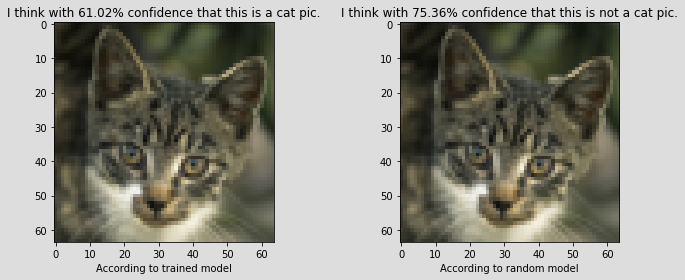

In [9]:
predictor = Predictor(w, b, "cat.png")
predictor.predict()